# **Predictive Analytics Gemstone Price**

Nama: Febri Isthifa Adha

Email: febriadha136@gmail.com



# **1. Import library**

In [1]:
# mengimpor pustaka yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **2. Data Loading**

Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

Dataset yang digunakan pada proyek ini:

https://www.kaggle.com/datasets/dhanrajcodes/gemstone-price

In [2]:
# Upload kaggle.json
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}"'.format(name=fn))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json"


In [3]:
# Ubah permission file
!chmod 600 /content/kaggle.json

In [4]:
# Download dataset
!kaggle datasets download -d dhanrajcodes/gemstone-price

Dataset URL: https://www.kaggle.com/datasets/dhanrajcodes/gemstone-price
License(s): other
 65% 2.00M/3.08M [00:00<00:00, 17.5MB/s]
100% 3.08M/3.08M [00:00<00:00, 21.5MB/s]


In [5]:
# Tentukan path ke file ZIP
zip_path = zipfile.ZipFile('/content/gemstone-price.zip', 'r')
zip_path.extractall('/content/')
zip_path.close()

# **3. Data Understanding**

Menampilkan isi dataset yang ada di `gemstone.csv`.

In [6]:
gemstone = pd.read_csv('/content/gemstone.csv')
gemstone

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


Menghapus kolom pertama yang berisikan nomor masing-masing data (id).

In [7]:
gemstone.drop("id",axis=1,inplace=True)

## **3.1 Exploratory Data Analysis**

Exploratory data analysis (EDA) merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

### **3.1.1 Deskripsi Variabel**

In [8]:
gemstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


Dari hasil di atas, terlihat bahwa kolom `cut`, `color`, `clarity` bertipe object, kolom `carat`, `depth`, `table`, `x`, `y`, `z` bertipe float64, dan kolom `price` bertipe int64.

Berikut merupakan arti dari masing-masing variabel beserta nilai-nilainya.

Variabel | Keterangan | Nilai
----------|----------|----------
id | Identifier unik untuk setiap batu permata |  1, 2, 3
carat | Berat batu permata dalam satuan karat |  0.2 - 5.01
cut | Kualitas potongan batu permata | Fair, Good, Very Good, Premium, Ideal
color | Warna batu permata | D, E, F, G, H, I, J (D best)
clarity | Tingkat kejernihan batu permata | I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (IF best)
depth | Total kedalaman dalam persentase | 43.0 - 79.0
table | Lebar bagian atas batu permata relatif terhadap titik terlebar | 43.0 - 95.0
x | Panjang batu permata dalam mm |  0.0 - 10.74
y | Lebar batu permata dalam mm | 0.0 - 58.9
price | Harga batu permata dalam (USD) | 326 - 18,823

### **3.1.2 Deskripsi Statistik Data**

Selanjutnya, kita akan melihat deskripsi statistik dari data yang dimiliki.

In [9]:
gemstone.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

### **3.1.3 Menangani Missing Value**

Pertama, kita akan memeriksa apakah ada nilai 0 pada kolom `x`, `y`, `z`.

In [10]:
x = (gemstone.x == 0).sum()
y = (gemstone.y == 0).sum()
z = (gemstone.z == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  3
Nilai 0 di kolom y ada:  2
Nilai 0 di kolom z ada:  10


Terlihat bahwa ada beberapa nilai di kolom `x`, `y`, dan `z` yang bernilai 0. Kita akan memeriksa baris dari nilai-nilai 0 tersebut.

In [11]:
gemstone.loc[(gemstone["z"] == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
8750,1.02,Premium,H,SI2,59.4,61.0,6.57,6.53,0.0,4144
39413,2.18,Premium,H,SI2,59.4,60.0,8.46,8.41,0.0,15842
92703,0.71,Good,F,SI1,64.1,60.0,0.00,0.00,0.0,2130
98719,2.17,Premium,H,SI2,60.3,57.0,8.42,8.36,0.0,15923
99624,2.20,Premium,I,SI2,60.1,60.0,8.45,8.41,0.0,11221
117161,2.20,Premium,F,SI2,60.3,58.0,8.49,8.45,0.0,15188
151690,2.18,Premium,I,VS2,61.2,62.0,8.45,8.37,0.0,15701
159429,2.18,Premium,H,SI2,60.8,59.0,8.42,8.38,0.0,13938
170318,0.71,Good,D,VS2,64.1,60.0,0.00,0.00,0.0,910
178000,0.71,Very Good,F,SI2,62.0,60.0,0.00,6.71,0.0,2130


Terlihat bahwa pada untuk `z` bernilai 0, ternyata juga terdapat seluruh nilai 0 pada kolom `x` dan `y`. Oleh karena itu, baris-baris ini akan dihapus.

In [12]:
# Menghapus baris dengan nilai "x", "y", dan "z" = 0
gemstone = gemstone.loc[(gemstone[["x", "y", "z"]] != 0).all(axis = 1)]

# Memeriksa ukuran data yang telah dihapus beberapa barisnya
gemstone.shape

(193563, 10)

Melakukan pengecekan ulang untuk missing value menggunakan `describe()`.

In [13]:
gemstone.describe()

,carat,depth,table,x,y,z,price
count,193563.000000,193563.000000,193563.000000,193563.000000,193563.000000,193563.000000,193563.000000
mean,0.790645,61.820608,57.227547,5.715312,5.720061,3.534429,3968.858687
std,0.462634,1.081658,1.918787,1.109117,1.102104,0.688471,4034.020215
min,0.200000,52.100000,49.000000,3.750000,3.710000,1.050000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,950.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5407.500000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


### **3.1.4 Memeriksa Data Duplikat**

In [14]:
# Menghitung jumlah baris yang duplikat dalam Dataset
jumlah_duplikat = gemstone.duplicated().sum()
print("\nJumlah Duplikat:", jumlah_duplikat)


Jumlah Duplikat: 0


Terlihat bahwa tidak ada data duplikat pada dataset.

### **3.1.5 Memeriksa Outlier**

Outliers merupakan sampel yang nilainya sangat jauh dari cakupan umum data utama, dengan itu kita akan memeriksa apakah terdapat outlier pada kolom-kolom numerik.

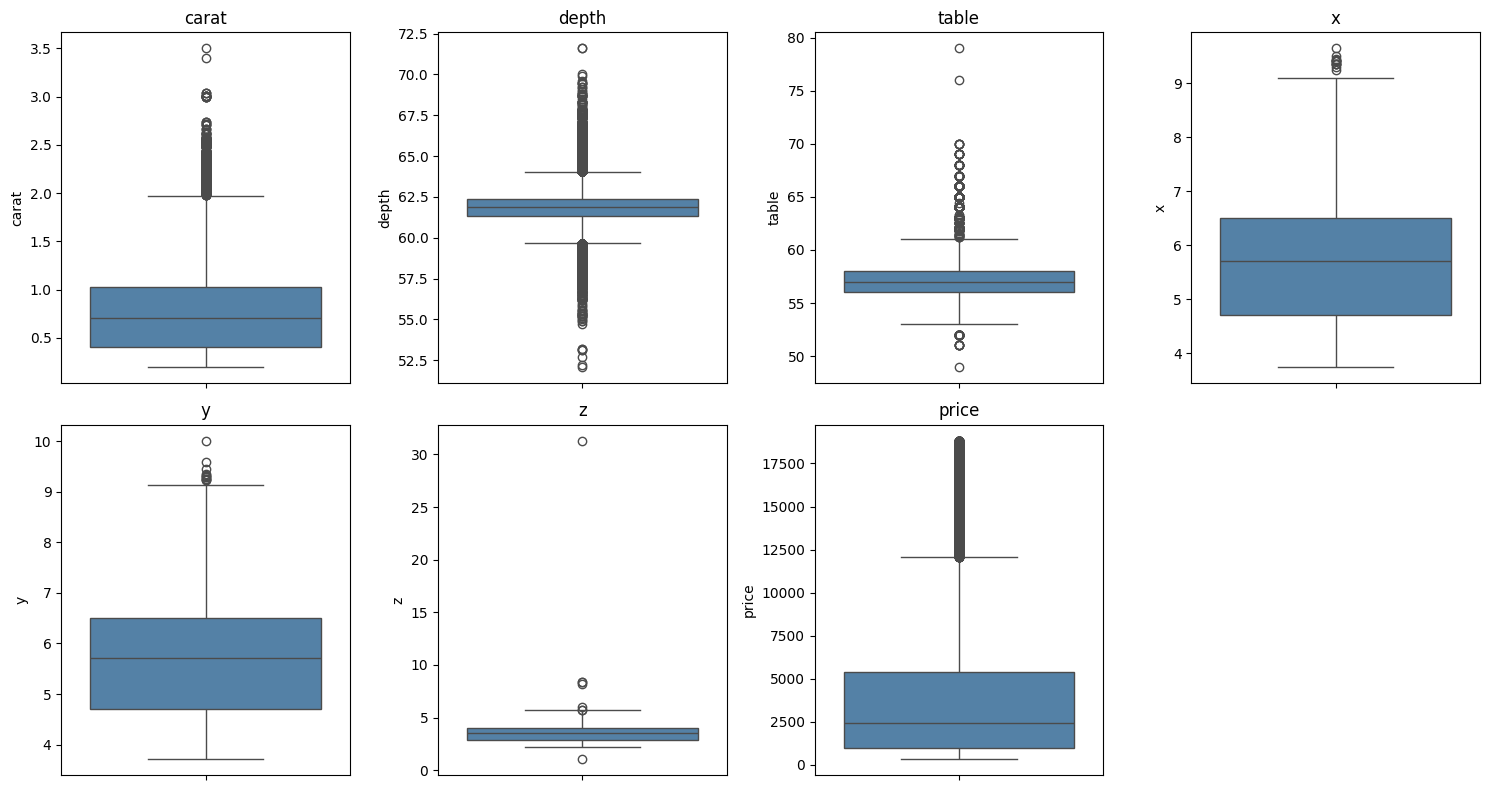

In [15]:
# Pilih hanya kolom numerik
numeric_columns = gemstone.select_dtypes(include=["number"]).columns

# Mengatur dimensi plot
plt.figure(figsize=(15, 8))

# Buat boxplot untuk setiap kolom numerik
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=gemstone, y=column, color="steelblue")
    plt.title(f'{column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Berdasarkan output diagram di atas terlihat bahwa ada outliers pada fitur carat, depth, table, price, x, y, dan z. Pada kasus ini, kita akan menghapus outlier menggunakan teknik Inter Quartile Range (IQR). IQR didefinisikan sebagai :


IQR = Inter Quartile Range

IQR = Q3 - Q1


In [16]:
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerik
Q1 = gemstone[numeric_columns].quantile(0.25)
Q3 = gemstone[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter DataFrame berdasarkan IQR
gemstone = gemstone[~((gemstone[numeric_columns] < (Q1 - 1.5 * IQR)) |
                    (gemstone[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis = 1)]

gemstone.shape

(168755, 10)

Jumlah Datasets setalah kita hapus Outlier: `168755, 10`

### **3.1.6 Univariate Analysis**

Membagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [17]:
# Membagi kolom-kolom menjadi kolom numerikal dan kolom kategorikal
numerical_features = ["price", "carat", "depth", "table", "x", "y", "z"]
categorical_features = ["cut", "color", "clarity"]

### a. Categorical Features

           jumlah sampel  persentase
cut                                 
Ideal              87180        51.7
Premium            41333        24.5
Very Good          31985        19.0
Good                8148         4.8
Fair                 109         0.1


<Axes: title={'center': 'cut'}, xlabel='cut'>

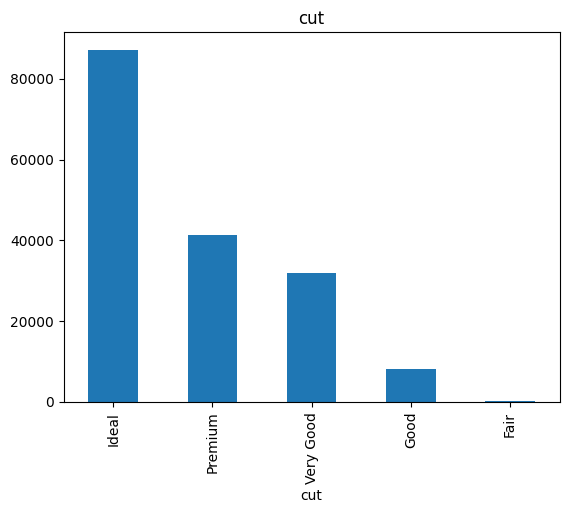

In [18]:
# Memeriksa Fitur Cut
feature = categorical_features[0]
count_cut = gemstone[feature].value_counts()
percent = 100 * gemstone[feature].value_counts(normalize = True)
df_cut = pd.DataFrame({"jumlah sampel" : count_cut, "persentase" : percent.round(1)})
print(df_cut)
count_cut.plot(kind = "bar", title = feature)

Terdapat 5 kategori pada fitur Cut, secara berurutan dari jumlahnya yang paling banyak yaitu: Ideal, Premium, Very Good, Good, dan Fair. Dari data persentase dapat kita simpulkan bahwa lebih dari 70% sampel merupakan gemstone tipe grade tinggi, yaitu grade Ideal dan Premium.

       jumlah sampel  persentase
color                           
G              39045        23.1
E              32172        19.1
F              30353        18.0
H              26219        15.5
D              22024        13.1
I              14134         8.4
J               4808         2.8


<Axes: title={'center': 'color'}, xlabel='color'>

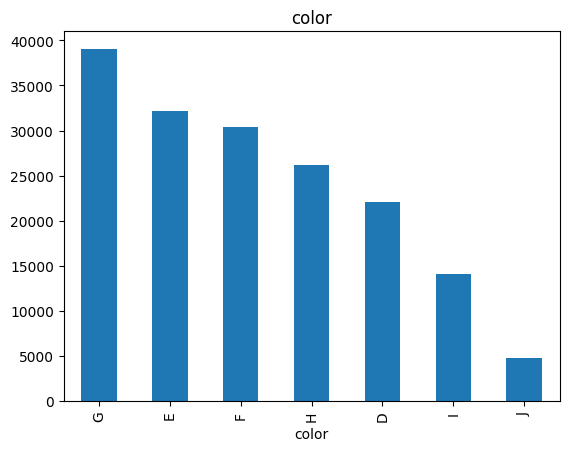

In [19]:
# Memeriksa Fitur Cut
feature = categorical_features[1]
count_color = gemstone[feature].value_counts()
percent = 100 * gemstone[feature].value_counts(normalize = True)
df_color = pd.DataFrame({"jumlah sampel" : count_color, "persentase" : percent.round(1)})
print(df_color)
count_color.plot(kind = "bar", title = feature)

Terdapat urutan kategori warna dari yang paling buruk hingga yang paling bagus adalah J, I, H, G, F, E, dan D. Dari grafik di atas, dapat disimpulkan bahwa sebagian besar grade berada pada grade menengah, yaitu G, F, H.

         jumlah sampel  persentase
clarity                           
SI1              46166        27.4
VS2              41818        24.8
VS1              27649        16.4
SI2              23786        14.1
VVS2             14736         8.7
VVS1             10177         6.0
IF                4036         2.4
I1                 387         0.2


<Axes: title={'center': 'clarity'}, xlabel='clarity'>

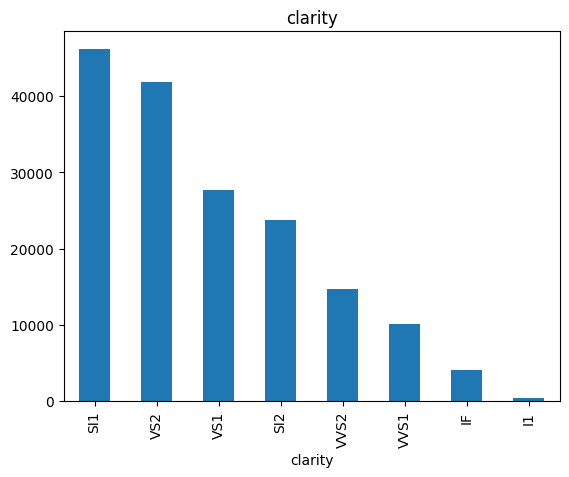

In [20]:
# Memeriksa Fitur Cut
feature = categorical_features[2]
count_clarity = gemstone[feature].value_counts()
percent = 100 * gemstone[feature].value_counts(normalize = True)
df_clarity = pd.DataFrame({"jumlah sampel" : count_clarity, "persentase" : percent.round(1)})
print(df_clarity)
count_clarity.plot(kind = "bar", title = feature)

Terdapat fitur Clarity terdiri dari 8 kategori dari yang paling buruk ke yang paling baik, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF. Dari grafik dapat disimpulkan bahwa sebagian besar fitur merupakan grade rendah, yaitu SI1, SI2, dan VS2.

### b. Numerical Features

Pada tiap fitur numerik akan membuat visualisasi dengan histogram sebagai berikut:

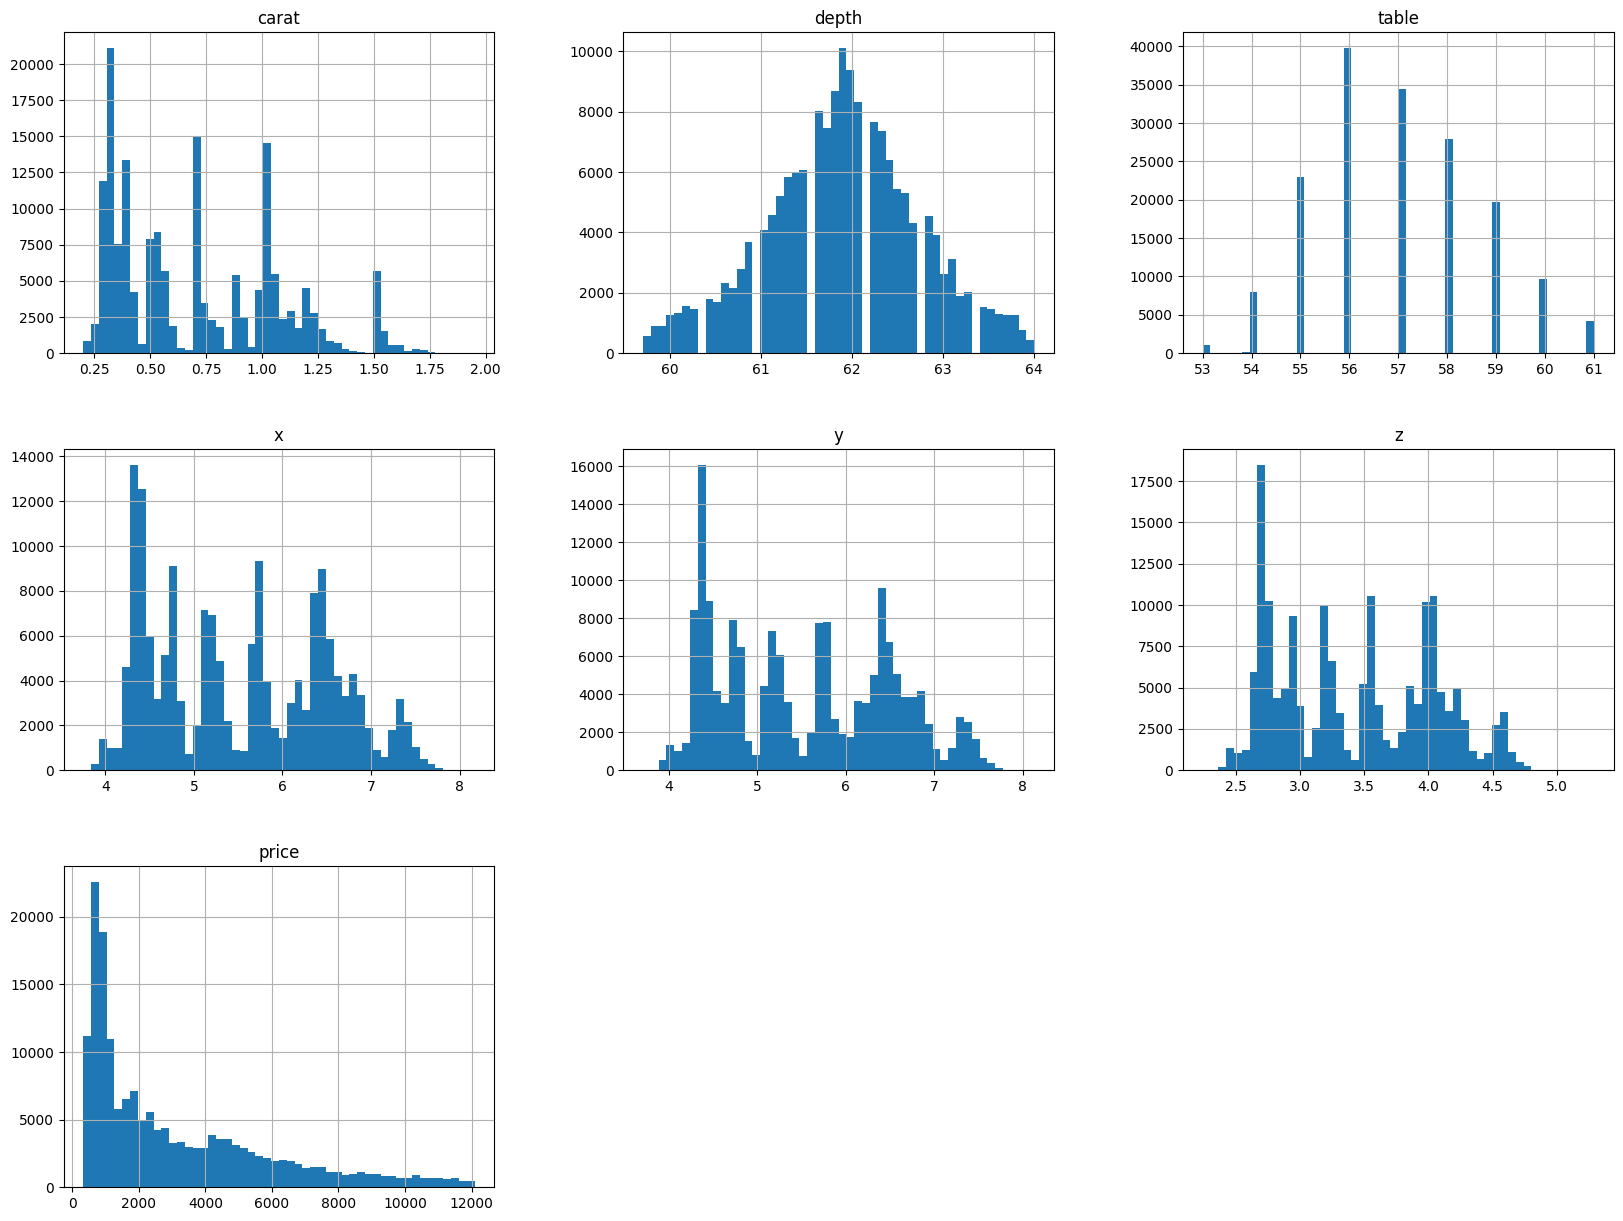

In [21]:
gemstone.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan grafik histogram di atas, dapat disimpulkan sebagai berikut:

- Pada fitur carat menunjukkan histogram right-skewed.
- Pada fitur depth menunjukkan histogram zero-skewed atau simetris/normal.
- Pada fitur table menunjukkan histogram right-skewed.
- Pada fitur price menunjukkan histogram right-skewed.
- Peningkatan harga gemstone sebanding dengan penurunan jumlah sampel.


### **3.1.7 Multivariate Analysis**

### a. Categorical Features

Mengecek rata-rata harga terhadap masing-masing fitur kategori yaitu cut, color dan clarity untuk mengetahui pengaruh fitur tersebut terhadap harga.

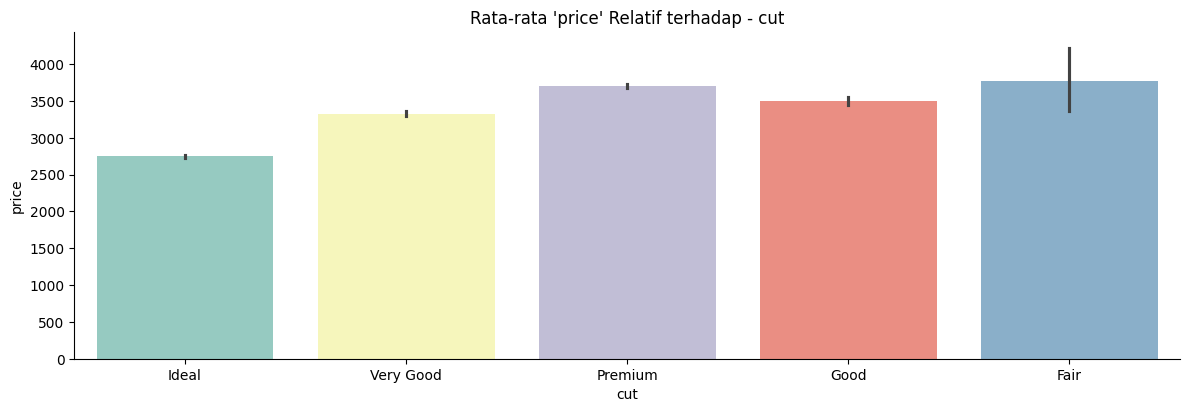

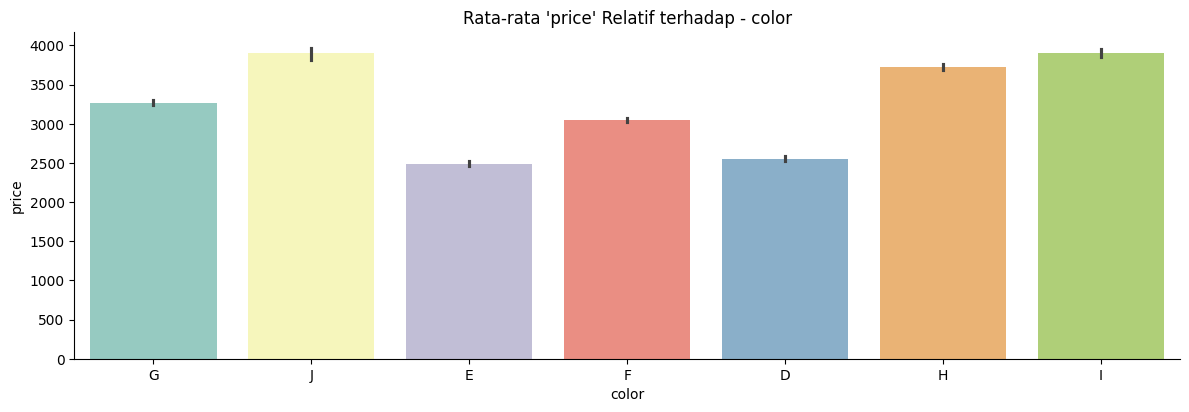

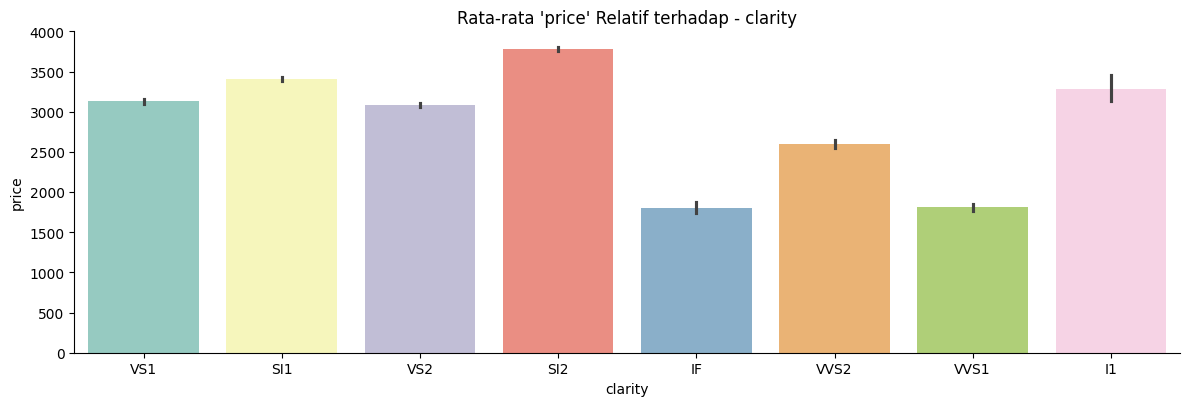

In [22]:
cat_features = gemstone.select_dtypes(include="object").columns.to_list()

for col in cat_features:
    sns.catplot(x=col, y="price", hue=col, kind="bar", dodge=False, height=4,
                aspect=3, data=gemstone, palette="Set3", legend=False)
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))
    plt.show()

b. Numerical Features

Mengecek rata-rata harga terhadap masing-masing fitur numerik yaitu carat, depth, table, x, y, dan z untuk mengetahui pengaruh fitur tersebut terhadap harga.

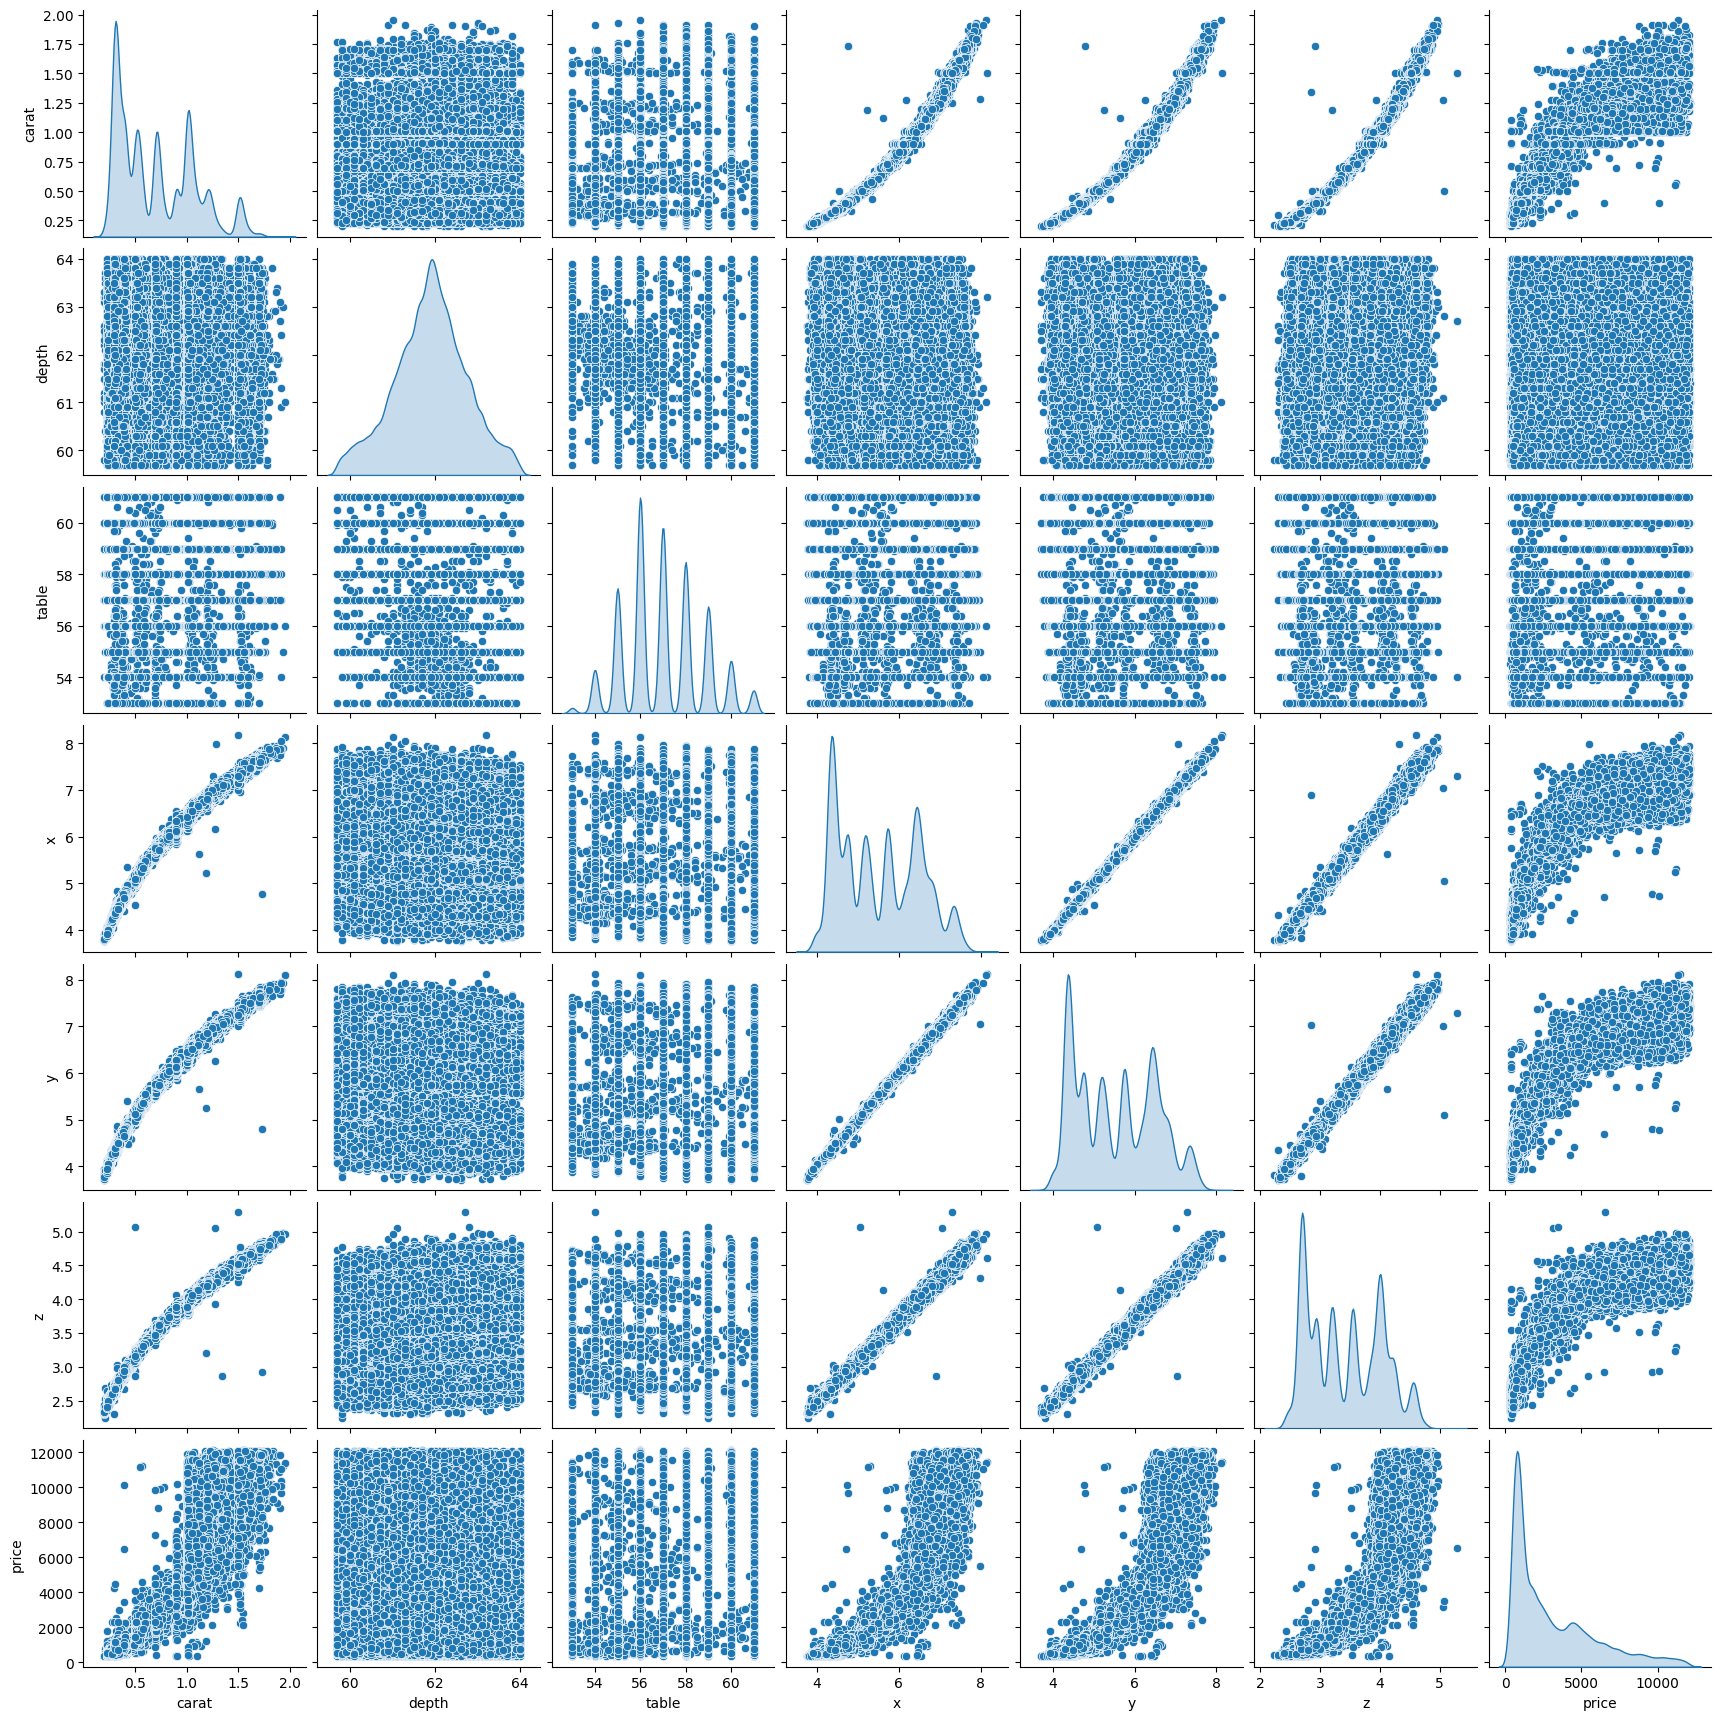

In [23]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(gemstone, diag_kind = 'kde')

### **3.1.8 Correlation Matrik**

Pengecekan korelasi atau hubungan antar fitur numerik menggunakan heatmap correlation matrix.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

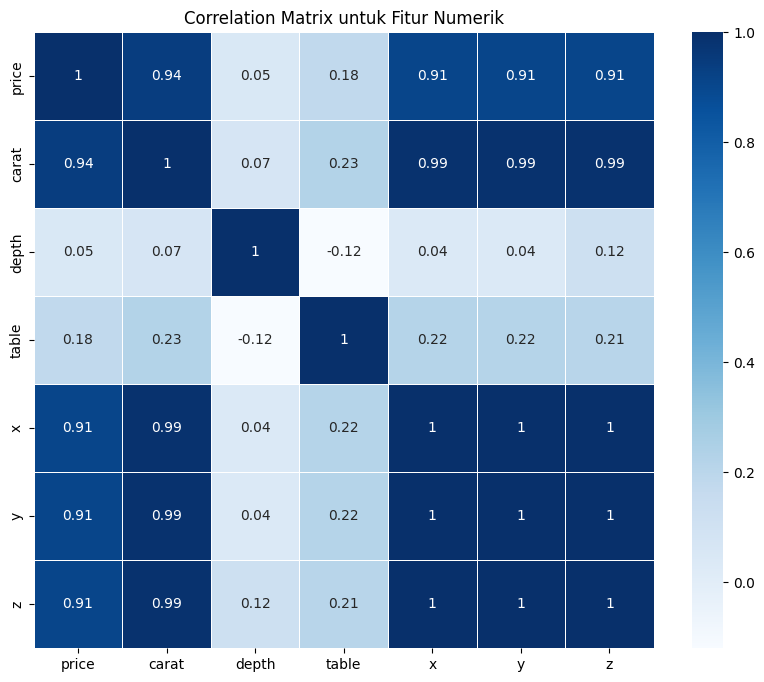

In [24]:
plt.figure(figsize = (10, 8))
correlation_matrix = gemstone[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot = True
sns.heatmap(data = correlation_matrix, annot = True, cmap = "Blues", linewidths = 0.5)
plt.title("Correlation Matrix untuk Fitur Numerik")

Berdasarkan diagram heatmap di atas, fitur 'carat', 'x', 'y', dan 'z' memiliki skor korelasi yang besar (diatas 0.9) dengan fitur target 'price'. Dimana, fitur 'price' berkolerasi tinggi dengan keempat fitur tersebut. Sementara fitur 'depth' memiliki korelasi yang sangat kecil (0.05). Sehingga fitur 'depth' dapat dihapus.

Menghapus fitur depth pada dataset karena memiliki korelasi yang rendah terhadap fitur price.

In [25]:
gemstone.drop(['depth'], inplace=True, axis=1)
gemstone.head()

,carat,cut,color,clarity,table,x,y,z,price
2,0.70,Ideal,G,VS1,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,56.0,4.38,4.41,2.71,666
5,1.51,Very Good,J,SI1,58.0,7.34,7.29,4.59,7506
6,0.74,Ideal,E,VS2,57.0,5.76,5.79,3.57,3229
7,1.34,Premium,G,SI2,57.0,7.00,7.05,4.38,6224


# **4. Data Preparation**

Pada tahap persiapan data atau data preparation dilakukan beberapa proses, yaitu encoding pada fitur kategori, reduksi dimensi dengan menggunakan Principal Component Analysis (PCA), Train Test Split, dan proses standarisasi data.

## **4.1 Encoding Fitur Kategori**

Melakukan proses encoding pada fitur kategori cut, color, dan clarity.

In [26]:
# Encoding Fitur Kategori
gemstone = pd.concat([gemstone, pd.get_dummies(gemstone["cut"], prefix = "cut")],axis = 1)
gemstone = pd.concat([gemstone, pd.get_dummies(gemstone["color"], prefix = "color")],axis = 1)
gemstone = pd.concat([gemstone, pd.get_dummies(gemstone["clarity"], prefix = "clarity")],axis = 1)
gemstone.drop(["cut", "color", "clarity"], axis = 1, inplace = True)
gemstone.head()

,carat,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
2,0.70,57.0,5.69,5.73,3.50,2772,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.32,56.0,4.38,4.41,2.71,666,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
5,1.51,58.0,7.34,7.29,4.59,7506,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
6,0.74,57.0,5.76,5.79,3.57,3229,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
7,1.34,57.0,7.00,7.05,4.38,6224,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


## **4.2 Reduksi Dimensi dengan PCA**


Melakukan pengecekan pada fitur ukuran gemstone yaitu fitur x, y, dan z.

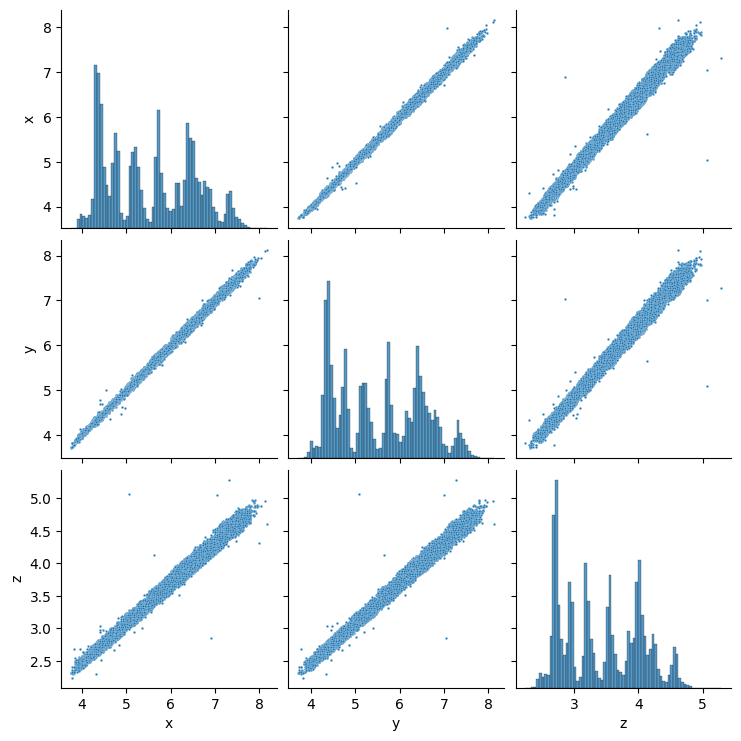

In [27]:
# Reduksi Dimensi dengan PCA
sns.pairplot(gemstone[["x", "y", "z"]], plot_kws = {"s": 3});

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3, random_state = 123)
pca.fit(gemstone[["x", "y", "z"]])
princ_comp = pca.transform(gemstone[["x", "y", "z"]])

Mendapatkan proporsi informasi dari ketiga komponen yaitu x, y, dan z.

In [29]:
pca.explained_variance_ratio_.round(3)

array([0.999, 0.001, 0.   ])

Membuat fitur baru untuk menggantikan fitur x, y, dan z yaitu dimension.

In [30]:
pca = PCA(n_components = 1, random_state = 123)
pca.fit(gemstone[["x", "y", "z"]])
gemstone["dimension"] = pca.transform(gemstone.loc[:,  ("x", "y", "z")]).flatten()
gemstone.drop(["x", "y", "z"], axis = 1, inplace = True)

## **4.3 Train Test Split**

Membagian dataset akan menggunakan proporsi pembagian 90:10 dengan fungsi train_test_split dari sklearn.

In [31]:
# Train-Test-Split
X = gemstone.drop(["price"],axis = 1)
y = gemstone["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [32]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 168755
Total # of sample in train dataset: 151879
Total # of sample in test dataset: 16876


## **4.4 Standarisasi**

StandardScaler dapat dirumuskan sebagai
$$z = \frac{x-u}{s}$$
dengan
* $z$: Nilai data setelah distandarisasi
* $x$: Nilai data sebelum distandarisasi
* $u$: Nilai rata-rata keseluruhan data
* $s$: Nilai standar deviasi data

In [33]:
from sklearn.preprocessing import StandardScaler

# Standarisasi
numerical_features = ["carat", "table", "dimension"]
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
170568,2.174997,1.182751,1.781618
35518,-0.008655,0.594073,0.161420
157089,0.018641,-1.937243,0.211925
77389,-1.073185,-1.171961,-1.232688
166262,-1.045890,-0.583283,-1.188510


In [34]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,151879.0000,151879.0000,151879.0000
mean,-0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.3734,-2.3493,-1.8553
25%,-0.9367,-0.5833,-0.9664
50%,-0.3089,0.0054,-0.1388
75%,0.8375,0.5941,0.9036
max,3.4033,2.3601,2.6412


Dapat dilihat bahwa setelah proses standarisasi sekarang nilai mean = 0 dan standar deviasi = 1.

# **5. Model Development**

Mempersiapkan dataframe untuk menganalisis ketiga model yang akan digunakan yaitu K-Nearest Neighbor, Random Forest, Gradient Boosting.

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index = ["train_mse", "test_mse"],
                      columns = ["KNN", "RandomForest", "Boosting"])

## **7.1 Model K-Nearest Neighbor**

K-Nearest Neighbors (KNN) adalah algoritma machine learning yang sederhana dan mudah dipahami untuk klasifikasi dan regresi. Algoritma ini bekerja dengan menemukan k tetangga terdekat dari data baru dan kemudian menggunakan kategori atau nilai rata-rata dari tetangga tersebut untuk memprediksi kategori atau nilai data baru.

In [36]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc["train_mse","knn"] = mean_squared_error(y_pred = knn.predict(X_train), y_true = y_train)

## **7.2 Model Random Forest**

Random Forest adalah algoritma machine learning ensemble yang menggabungkan beberapa decision tree untuk meningkatkan akurasi prediksi. Algoritma ini bekerja dengan membuat banyak decision tree secara acak dan kemudian menggunakan voting untuk memprediksi kategori atau nilai data baru.

In [37]:
RF = RandomForestRegressor(n_estimators = 50, max_depth = 10, random_state = 55, n_jobs = -1)
RF.fit(X_train, y_train)
models.loc["train_mse", "RandomForest"] = mean_squared_error(y_pred = RF.predict(X_train), y_true = y_train)

## **7.3 Model Gradient Boosting**

Gradient Boosting adalah algoritma machine learning yang menggunakan teknik ensembel learning dari decision tree untuk memprediksi nilai. Gradient Boosting sangat mampu menangani pattern yang kompleks dan data ketika linear model tidak dapat menangani.

In [38]:
boosting = GradientBoostingRegressor(max_depth=7, random_state=55)
boosting.fit(X_train, y_train)
models.loc["train_mse", "Boosting"] = mean_squared_error(y_pred = boosting.predict(X_train), y_true = y_train)

# **8. Evaluasi Model**

Melakukan proses scaling fitur numerik pada data uji agar skala antara data latih dan data uji sama.

In [39]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata = 0 dan varians = 1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Untuk evaluasi, kita akan menggunakan *Mean Squared Error* (MSE). MSE dirumuskan sebagai :
$$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$

Keteranga :
* $N$: Jumlah data
* $y_i$: Nilai y sesungguhnya
* $\hat{y_i}$: Nilai y prediksi


In [40]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {"KNN": knn, "RF": RF, "Boosting": boosting}

for name, model in model_dict.items():
    mse.loc[name, "train"] = mean_squared_error(y_true = y_train, y_pred = model.predict(X_train))/1e3
    mse.loc[name, "test"] = mean_squared_error(y_true = y_test, y_pred = model.predict(X_test))/1e3

mse

,train,test
KNN,158.060099,188.027968
RF,184.881839,189.772913
Boosting,133.044841,146.840974


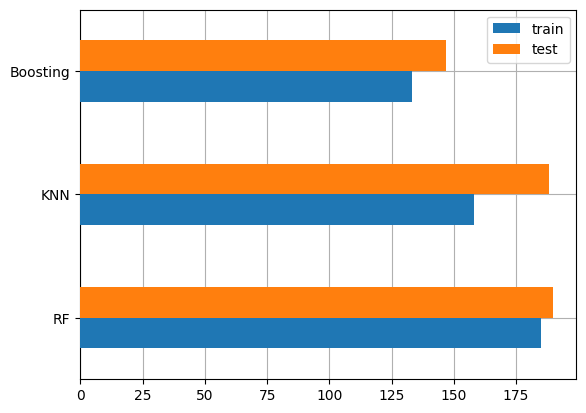

In [41]:
fig, ax = plt.subplots()
mse.sort_values(by = "test", ascending = False).plot(kind = "barh", ax = ax, zorder = 3)
ax.grid(zorder = 0)

Berdasarkan grafik di atas, dapat disimpulkan sebagai berikut:

- Model dengan Gradient Boosting memberikan nilai error yang paling besar yaitu train sebesar 133.044841 dan test sebesar 146.840974.
- Model dengan algoritma KKN memberikan nilai error train sebesar 158.060099 dan test sebesar 188.027968.
- Model dengan algoritma Random Forest memberikan nilai error yang paling kecil yaitu train sebesar 184.881839 dan test sebesar 189.772913.

In [42]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
65114,868,944.0,701.4,915.8


Terlihat bahwa prediksi model KNN, prediksi model RF, dan prediksi model Bossting adalah 994, 701, dan 915 dari y_true 868. Dari ketiga model, model yang memiliki nilai prediksi meleset sangat kecil adalah model Boosting dan model yang memiliki nilai prediksi meleset sangat besar adalah RF.